In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.1.0
sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)
matplotlib 2.2.3
numpy 1.18.1
pandas 0.22.0
sklearn 0.19.1
tensorflow 2.1.0
tensorflow_core.keras 2.2.4-tf


In [24]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
type(fashion_mnist.load_data())

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


tuple

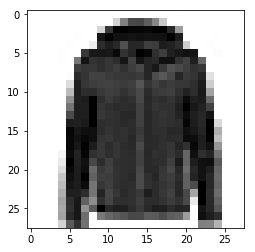

In [25]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.show()

show_single_image(x_train[0])

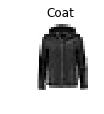

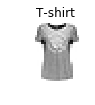

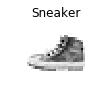

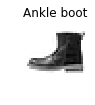

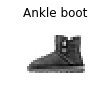

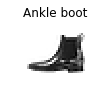

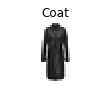

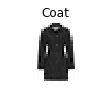

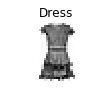

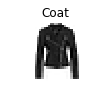

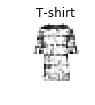

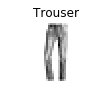

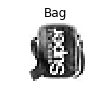

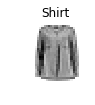

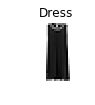

In [26]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap="binary",
                      interpolation='nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
            plt.show()
            
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

show_imgs(3, 5, x_train, y_train, class_names)

In [27]:
# tf.keras.models.Sequential()

"""
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
"""

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# relu: y = max(0, x)
# softmax: 将向量变成概率分布 x = [x1, x2, x3],
#     y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3

# reason for sparse: y->index. y->one_hot->[]
# 如果 y 不是一个向量用 loss = categorial_crossentropy, 如果 y 是一个向量用 loss = categorial_crossentropy
model.compile(loss="sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"]) 

In [28]:
# 查看模型层数
model.layers

In [29]:
# 查看模型概况
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_16 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [30]:
# [None, 784] * W + b -> [None, 300] W.shape [784 * 300], b = [300]

In [31]:
# 开启训练
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 57us/sample - loss: nan - accuracy: 0.1009 - val_loss: nan - val_accuracy: 0.0914
Epoch 2/10
55000/55000 [==============================] - 3s 52us/sample - loss: nan - accuracy: 0.1008 - val_loss: nan - val_accuracy: 0.0914
Epoch 3/10
55000/55000 [==============================] - 3s 54us/sample - loss: nan - accuracy: 0.1008 - val_loss: nan - val_accuracy: 0.0914
Epoch 4/10
55000/55000 [==============================] - 3s 53us/sample - loss: nan - accuracy: 0.1008 - val_loss: nan - val_accuracy: 0.0914
Epoch 5/10
55000/55000 [==============================] - 3s 53us/sample - loss: nan - accuracy: 0.1008 - val_loss: nan - val_accuracy: 0.0914
Epoch 6/10
55000/55000 [==============================] - 3s 55us/sample - loss: nan - accuracy: 0.1008 - val_loss: nan - val_accuracy: 0.0914
Epoch 7/10
55000/55000 [==============================] - 3s 58us/sample - loss: nan - accura

In [11]:
type(history)

tensorflow.python.keras.callbacks.History

In [12]:
history.history

{'loss': [1242927.7795051334,
  2.302728913601962,
  2.3026931696458295,
  2.3026893432617186,
  2.302682645693692,
  2.302685611967607,
  2.3026919833443382,
  2.302702417165583,
  2.3026830128409648,
  2.3026715634779498],
 'accuracy': [0.09716364,
  0.09790909,
  0.0972,
  0.09914546,
  0.09785455,
  0.09747273,
  0.09772728,
  0.09803636,
  0.098672725,
  0.09987273],
 'val_loss': [2.4078593410491944,
  2.30262530708313,
  2.302910609436035,
  2.3027028327941896,
  2.302989377593994,
  2.3027301124572754,
  2.3027346267700195,
  2.302793339538574,
  2.3028672210693357,
  2.30284490776062],
 'val_accuracy': [0.0988,
  0.1008,
  0.0914,
  0.1012,
  0.098,
  0.098,
  0.0986,
  0.0914,
  0.0986,
  0.1002]}

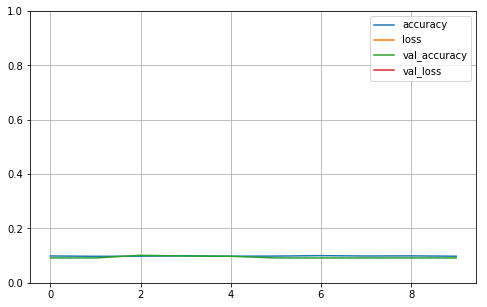

In [19]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    
plot_learning_curves(history)